# Regression with MLP in Keras using RVE engineering coefficients
Ehsan Ghane March 28 2022

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.dpi'] =240
mpl.rcParams['savefig.dpi'] = 240

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

In [3]:
pwd

'C:\\Users\\xghaeh\\C Documents\\Ehsan code\\Phase 1 project on elasticity'

# input in the microscale
EM : elastic modulus of matrix \
muM : Poisson ration of matrix\
EF : Elastic modulus of fibre\
nuF : Poisson ratio of fiber\
phiF : fiber volume fraction inside the UD yarns
\
E11 [MPa]: elastic tensile modulus of the UD RVE
nu12 : shear poisson ration of the UD RVE in 1-2 plane
\
Ex [GPa]: in-plane tensile elastic modulus of the woven RVE
nu_xy : in-plane poisson ration of the woven RVE


In [4]:
# input for dry properties and hemogenised properties of UD composite for the yarns
df = pd.read_excel("ElasEngCoefDataSet.xlsx",
                  sheet_name='400without_header',
                  header=None,
                  names=[ "EM", "nuM", "EF", "nuF", 
                        "E11", "E22", "E33", 
                         "nu12", "nu21", "nu13", "nu31", "nu23", "nu32", 
                         "G12", "G23", "G13","phiF",
                        "Ex", "Ey", "Gxy", "nu_xy"])
#__["EM", "nuM", "EF", "nuF","phiF"]:
#_________input parameters of the microscopic model generated from the Sobol sequence technique
#__["E11", "E22", "E33","nu12", "nu21", "nu13", "nu31", "nu23", "nu32","G12", "G23", "G13"]:
#_________UD RVE elastic properties computed numerically in Digimat sofware
#__["Ex", "Ey", "Gxy", "nu_xy"]:
#_________Woven RVE elastic response computed analytically based on Ghane-2020 

# output in the mesoscale from a CSV file computetd from FE modeling of woven RVEs
Df = pd.read_csv('WovenMesoscaleElasticModule.csv',
                nrows =400)
Df = Df.drop( 'Unnamed: 0' , axis = 1)
#__['E1', 'v12', 'v13', 'E2', 'v21', 'v23', 'E3', 'v31', 'v32', 'G23','G31', 'G12', 'CTE_1', 'CTE_2', 'CTE_3']
#_________Woven RVE elastic response computed by FE in TexGen based on the aformentioned hemogenized UD properties

In [5]:
df.tail()

,EM,nuM,EF,nuF,E11,E22,E33,nu12,nu21,nu13,...,nu23,nu32,G12,G23,G13,phiF,Ex,Ey,Gxy,nu_xy
395,5594.726562,0.274844,512985.742188,0.232422,277883.30,20446.33,20170.67,0.245850,0.018089,0.246130,...,0.309010,0.304840,8954.333,8115.000,8817.667,0.546680,57.760847,48.846884,4.223481,0.060360
396,8844.726562,0.394844,154435.742188,0.332422,66103.33,22533.67,22056.67,0.365067,0.124443,0.367000,...,0.487067,0.476733,7465.000,7396.000,7178.000,0.396680,25.696487,23.102565,3.528388,0.247939
397,7219.726562,0.334844,333710.742188,0.282422,112250.00,15432.00,14943.67,0.312213,0.042923,0.314077,...,0.426367,0.412867,5717.333,5199.000,5496.667,0.321680,30.449141,26.234713,2.697591,0.132011
398,3969.726562,0.454844,692260.742188,0.382422,324016.70,20472.00,20159.67,0.416300,0.026302,0.417967,...,0.656067,0.646067,4362.000,6362.667,4442.667,0.471680,50.299519,45.155406,2.075039,0.088725
399,4172.851562,0.327344,580213.867188,0.363672,326996.70,18228.33,19327.33,0.351867,0.019615,0.352933,...,0.328520,0.348333,6957.000,6969.333,7299.667,0.574805,59.040956,50.624972,3.288269,0.061935


In [6]:
Df.columns

Index(['E1', 'v12', 'v13', 'E2', 'v21', 'v23', 'E3', 'v31', 'v32', 'G23',
       'G31', 'G12', 'CTE_1', 'CTE_2', 'CTE_3'],
      dtype='object')

In [7]:
Features = df[['phiF','EM','nuM','EF','nuF']]
# to_numpy(np.float32)any
Output = Df[['E1','E3','v12','v23','G12','G23']]
#Output_analytical = df[['Ex','Ey','Gxy','nu_xy']]
# E22 is almost equal to E11 

In [8]:
Features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phiF,400.0,0.450242,0.086614,0.301172,0.375879,0.450586,0.525293,0.599414
EM,400.0,6742.033691,1876.179494,3525.390625,5121.826172,6743.652344,8365.478516,9987.304688
nuM,400.0,0.370137,0.069138,0.250937,0.310703,0.369766,0.429648,0.489531
EF,400.0,429108.151855,206642.417684,71801.171875,250375.878906,428950.585938,605774.560547,784699.414062
nuF,400.0,0.300081,0.057675,0.200391,0.250293,0.300195,0.350098,0.399219


In [9]:
Output.describe().transpose()
#G13 is found equal to G12
#E33 is also found almost equal to E22

,count,mean,std,min,25%,50%,75%,max
E1,400.0,53958.503500,23055.326353,4896.4000,35967.250000,53384.00000,69616.750000,118180.0000
E3,400.0,16982.306250,8043.571359,4896.4000,11678.250000,15091.50000,20492.250000,56392.0000
v12,400.0,0.169063,0.041399,0.1120,0.141125,0.16005,0.188675,0.4382
v23,400.0,0.468625,0.101979,0.2997,0.383275,0.45860,0.547450,0.7072
G12,400.0,4699.856000,1500.903612,1702.3000,3548.625000,4549.70000,5701.050000,9269.2000
G23,400.0,4090.311500,1189.447436,1702.3000,3133.075000,4027.65000,4978.500000,6999.5000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(Features, Output, test_size=None , random_state=42)

scaler1 = MinMaxScaler()
#scaler2 = StandardScaler()


X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)


In [11]:
# description of input and output in Dataframe format: 
xx_test=pd.DataFrame(X_test,columns = ['phiF','EM','nuM','EF','nuF'])
yy_test=pd.DataFrame(y_test,columns = ['E1','E3','v12','v23','G12','G23'])

yy_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E1,100.0,0.445336,0.201384,0.116968,0.295650,0.430531,0.579297,0.947830
E3,100.0,0.242545,0.143412,0.048963,0.140548,0.211224,0.308043,0.718442
v12,100.0,0.173500,0.135794,-0.006790,0.083488,0.148148,0.220988,0.702778
v23,100.0,0.456830,0.258233,0.026191,0.251933,0.429284,0.660763,1.016463
G12,100.0,0.399580,0.205715,0.028215,0.214209,0.409765,0.533703,0.896761
G23,100.0,0.458637,0.233993,0.036925,0.246725,0.480395,0.636945,0.953806


In [12]:
xx_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phiF,100.0,0.481218,0.298085,0.011788,0.207269,0.462672,0.741159,0.978389
EM,100.0,0.516739,0.306764,0.001965,0.221513,0.563851,0.788802,0.994106
nuM,100.0,0.537328,0.290101,0.003929,0.344303,0.561886,0.794204,0.994106
EF,100.0,0.526326,0.287007,0.003929,0.270629,0.557957,0.755403,0.998035
nuF,100.0,0.476817,0.291057,0.021611,0.221513,0.459725,0.720530,0.996071


In [13]:
#Check validity of inputs (no NaNs or sometimes 0s).
#df.isnull().any()

In [14]:
#np.(y_test, ddof=1)

# Neural network implementation

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# programmatic network configuration
There is a rule of thumb that helps for supervised learning problems. You can usually prevent over-fitting if you keep your number of "trainable parameters" as below:\
Nh=Ns/(α∗(Ni+No));\
Ni = number of input neurons.\
No = number of output neurons.\
Ns = number of samples in training data set.\
α = an arbitrary scaling factor usually 2-10.\
You can think of α as the effective branching factor or number of nonzero weights for each neuron. Dropout layers will bring the "effective" branching factor way down from the actual mean branching factor for your network.

You want to limit the number of free parameters in your model (its degree or number of nonzero weights) to a small portion of the degrees of freedom in your data. The degrees of freedom in your data is the number samples * degrees of freedom (dimensions) in each sample or Ns∗(Ni+No)
(assuming they're all independent). So α is a way to indicate how general you want your model to be, or how much you want to prevent overfitting.\

For an automated procedure you'd start with an α of 2 (twice as many degrees of freedom in your training data as your model) and work your way up to 10 if the error (loss) for your training dataset is significantly smaller than for your test dataset.\
Ref:https://hagan.okstate.edu/NNDesign.pdf#page=469

In [16]:
np.random.seed(42)
tf.random.set_seed(42)
#____________________________________________________________________________
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(6)
]) #6 output neurons represints 3D elastic properties of woven RVE ['E1','E3','v12','v23','G12','G23']

model.summary()
# After the model is created compile() is called to specify the loss function and optimizer
# The learning rate "lr" can be set after the default value = 0.01

# Define the K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.Adam(lr=1e-5),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
#____________________________________________________________________________
#from keras.callbacks import CSVLogger
#check if there is a log file or not first
#csv_logger = CSVLogger('models/training_full_dataset.log', separator=',', append=False)
#model.fit(X_train, y_train, validation_split=0.1, epochs=2000, callbacks=[csv_logger])

history = model.fit(X_train, y_train, epochs=2000, validation_split=0.1)
            # Keras will measure the loss and the extra metrics on validation set at the end of each EPOCH
            # if performance is better on validation set than the training set >> overfitting problem or data mismatch
            # And that's it! the neural network is trained
#____________________________________________________________________________
            # Once you're satisfied with your model's validation accuracy, 
            # it's time to evaluate the model on test set
mse_test = model.evaluate(X_test, y_test)
    
            # make prediction on the first three instance of the test set, since we had not any other data:
#X_new = X_test[:3]
#y_absolute = y_test [:3]
#y_pred = model.predict(X_new)
#____________________________________________________________________________
model.save('E:\\1_PhD projects\\1_Publications\\First paper\\figures\\MesoScalePredictor')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 9,094
Trainable params: 9,094
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
9/9 [==============================] - 1s 61ms/step - loss: 0.1525 - root_mean_squared_error: 0.3906 - val_loss: 0.1461 - val_root_mean_squared_error: 0.3823
Epoch 2/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.1510 -

Epoch 44/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0980 - root_mean_squared_error: 0.3130 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 45/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0969 - root_mean_squared_error: 0.3113 - val_loss: 0.0928 - val_root_mean_squared_error: 0.3046
Epoch 46/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0958 - root_mean_squared_error: 0.3096 - val_loss: 0.0917 - val_root_mean_squared_error: 0.3028
Epoch 47/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0947 - root_mean_squared_error: 0.3078 - val_loss: 0.0906 - val_root_mean_squared_error: 0.3011
Epoch 48/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0936 - root_mean_squared_error: 0.3060 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2993
Epoch 49/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0925 - root_mean_squared_error: 0.3042 - val_loss: 0.0885 - val_root_m

Epoch 92/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0522 - root_mean_squared_error: 0.2284 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2183
Epoch 93/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0515 - root_mean_squared_error: 0.2269 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 94/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0508 - root_mean_squared_error: 0.2253 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2149
Epoch 95/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0501 - root_mean_squared_error: 0.2237 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2132
Epoch 96/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0494 - root_mean_squared_error: 0.2222 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 97/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0487 - root_mean_squared_error: 0.2207 - val_loss: 0.0441 - val_root_m

Epoch 140/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0289 - root_mean_squared_error: 0.1700 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1525
Epoch 141/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 142/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 143/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0281 - root_mean_squared_error: 0.1676 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 144/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0279 - root_mean_squared_error: 0.1669 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 145/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0276 - root_mean_squared_error: 0.1661 - val_loss: 0.0219 - val_

Epoch 235/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 236/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 237/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 238/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1255 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 239/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1067
Epoch 240/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0113 - val_

9/9 [==============================] - 0s 6ms/step - loss: 0.0091 - root_mean_squared_error: 0.0955 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0837
Epoch 330/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834
Epoch 331/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 332/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0090 - root_mean_squared_error: 0.0946 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 333/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0089 - root_mean_squared_error: 0.0943 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 334/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0068 - val_root_mean_squar

Epoch 377/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0746
Epoch 378/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0745
Epoch 379/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0068 - root_mean_squared_error: 0.0823 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 380/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0067 - root_mean_squared_error: 0.0821 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0742
Epoch 381/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 382/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817 - val_loss: 0.0055 - val_

Epoch 472/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 473/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0693 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 474/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 475/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 476/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0691 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 477/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0690 - val_loss: 0.0041 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0570
Epoch 567/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0570
Epoch 568/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 569/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 570/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 571/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0032 - val_root_mean_squar

Epoch 614/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 615/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 616/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 617/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0537
Epoch 618/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 619/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0029 - val_

Epoch 709/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 710/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 711/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 712/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 713/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 714/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0024 - val_

Epoch 804/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 805/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 806/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 807/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 808/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 809/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0021 - val_

Epoch 899/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 900/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 901/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 902/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 903/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0430
Epoch 904/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0018 - val_

Epoch 994/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 995/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 996/2000
9/9 [==============================] - 0s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408
Epoch 997/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 998/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408
Epoch 999/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0017 - val_

9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0394
Epoch 1089/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0394
Epoch 1090/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0394
Epoch 1091/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 1092/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 1093/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0015 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1183/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1184/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 1185/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1186/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 1187/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0444 - val_loss: 0.0014 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1277/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1278/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1279/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 1280/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 1281/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0014 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 1371/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 1372/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 1373/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 1374/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 1375/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_

9/9 [==============================] - 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1465/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 1466/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1467/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1468/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 1469/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0012 - val_root_mean_

Epoch 1511/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 1512/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 1513/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 1514/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 1515/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 1516/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 0.0012 

9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 1606/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0342
Epoch 1607/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 1608/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 1609/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 1610/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0012 - val_root_mean_

9/9 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 1700/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 1701/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 1702/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 1703/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 1704/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.0011 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 1794/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 1795/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 1796/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 1797/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 1798/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0011 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 1888/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 1889/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 1890/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 1891/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 1892/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0011 - val_root_mean_

9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 1982/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 1983/2000
9/9 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 1984/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 1985/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 1986/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0010 - val_root_mean_

In [17]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [18]:
print(history.params)
print(mse_test)

{'verbose': 1, 'epochs': 2000, 'steps': 9}
[0.0011702710762619972, 0.034209225326776505]


# Visualisation of the loss function

In [19]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [20]:
loss_metrices = pd.DataFrame(history.history)

In [21]:
hist = pd.DataFrame(history.history)

In [22]:
hist[['loss','val_loss', 'root_mean_squared_error','val_root_mean_squared_error']]

,loss,val_loss,root_mean_squared_error,val_root_mean_squared_error
0,0.152538,0.146144,0.390561,0.382288
1,0.151032,0.144668,0.388628,0.380353
2,0.149518,0.143224,0.386676,0.378450
3,0.148009,0.141798,0.384720,0.376561
4,0.146534,0.140377,0.382798,0.374669
...,...,...,...,...
1995,0.001419,0.001034,0.037672,0.032160
1996,0.001419,0.001032,0.037672,0.032122
1997,0.001420,0.001033,0.037687,0.032139
1998,0.001418,0.001032,0.037658,0.032120


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
#plt.savefig("loss.svg")

In [23]:
pwd

'C:\\Users\\xghaeh\\C Documents\\Ehsan code\\Phase 1 project on elasticity'

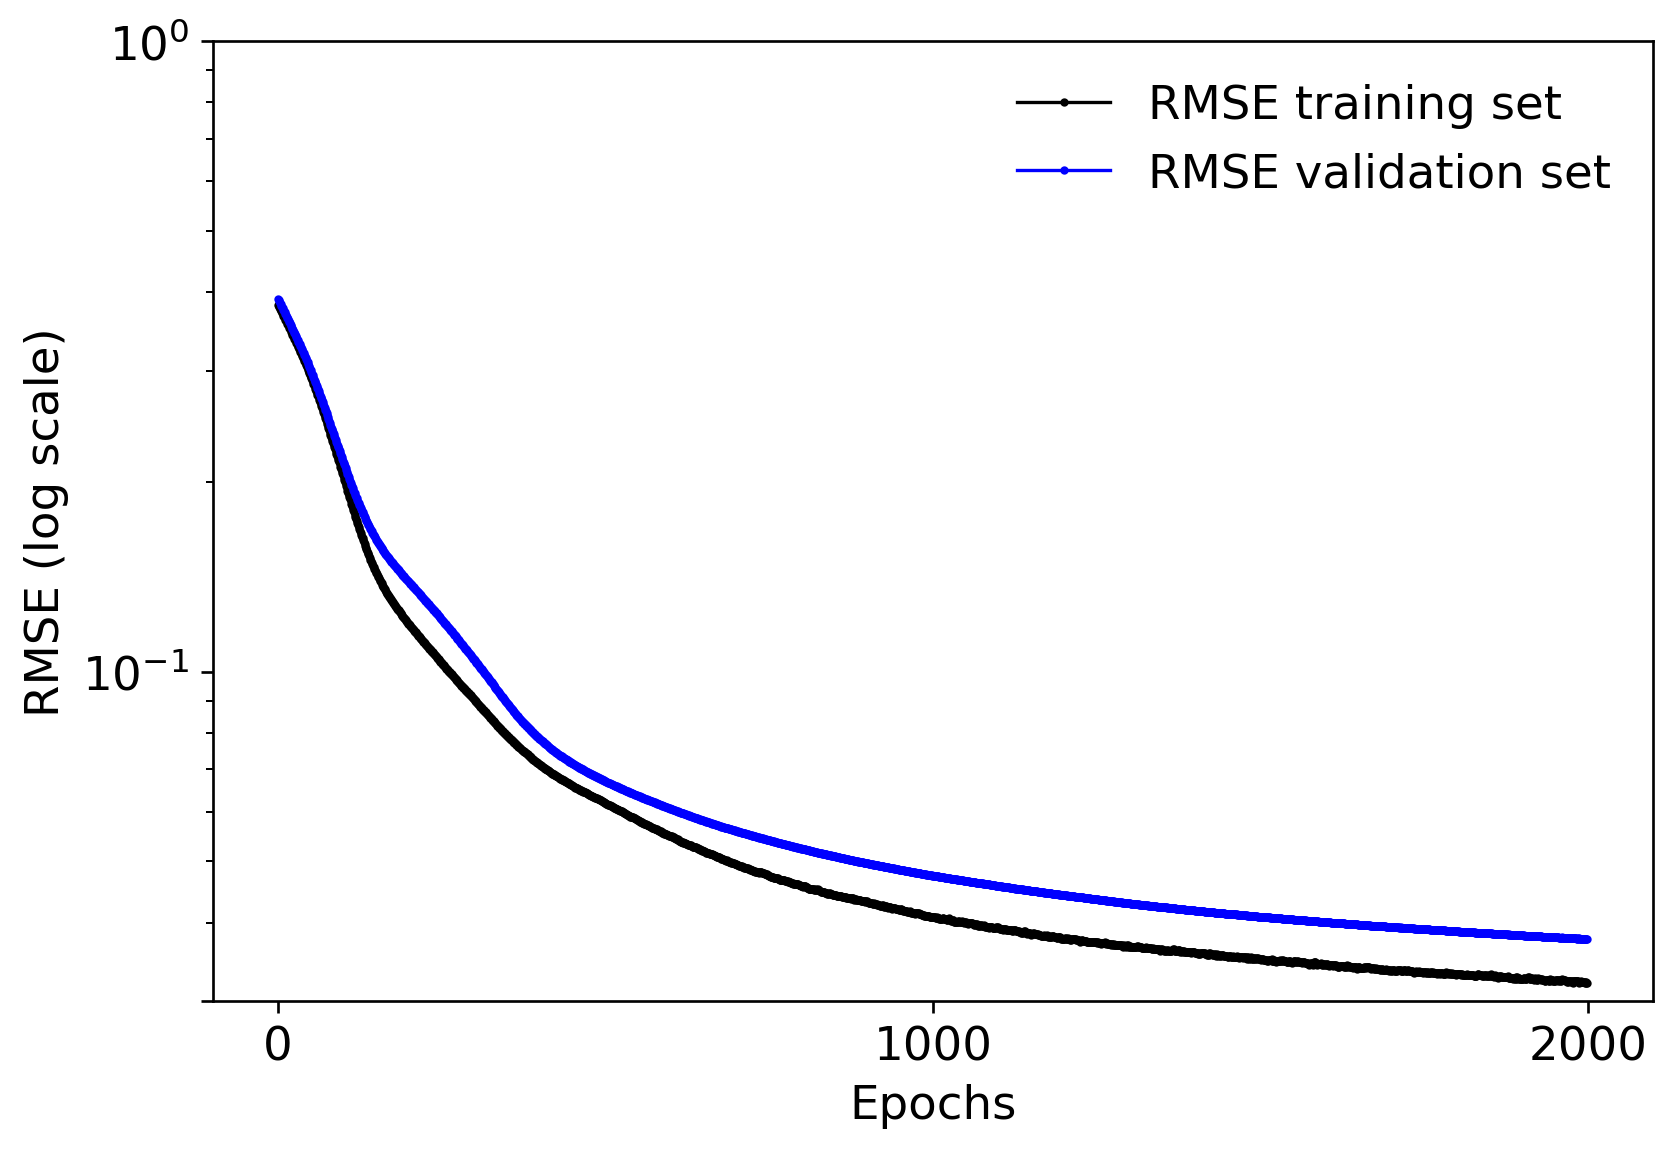

In [57]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, MaxNLocator)
import matplotlib.ticker as ticker

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))


#ax2 = plt.twinx(ax)
#ax2.plot(loss_metrices['val_loss'],label = 'Loss training set',color='red', marker='+', linestyle='-', linewidth=.5, markersize=.5)

#ax2.plot(loss_metrices['loss'],label = 'Loss validation set',color='orange', marker='+', linestyle='-', linewidth=.5, markersize=.5)
#ax2.set_ylabel('Loss')
#ax2.set_yscale('log')


ax.plot(loss_metrices['val_root_mean_squared_error'],label = 'RMSE training set',color='black', marker='o', linestyle='-', linewidth=1, markersize=1.5)

ax.plot(loss_metrices['root_mean_squared_error'],label = 'RMSE validation set',color='blue', marker='o', linestyle='-', linewidth=1, markersize=1.5)
ax.set_xlabel('Epochs')
ax.set_ylabel('RMSE (log scale)')
ax.set_yscale('log')

# Set the y-axis limits
ax.set_ylim([3*10**-2, 10**0])
ax.set_yticks([3*10**-2, 10**-1, 10**0])

#ax.spines['bottom'].set_linestyle("dashed")
#ax2.spines['bottom'].set_linestyle("dashed")


# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, LogLocator)
ax.xaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_major_locator(MultipleLocator(base=.1))
#ax.yaxis.set_major_locator(LogLocator(base=10, numticks=10))
#ax2.yaxis.set_major_locator(MultipleLocator(base=.05))
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%1.2f'))



#to locate the legends in an arbitary position use bbox
#to remove border arround the legends use frameon=0
fig.legend(loc='upper right', bbox_to_anchor=(1, 1),frameon=0)
#plt.plot(loss_metrices['root_mean_squared_error'])
# convert y-axis to Logarithmic scale
#plt.yscale("log")

plt.grid(False)
plt.savefig("E:\\1_PhD projects\\1_Publications\\First paper\\figures\\Meso_loss_epochs_log.svg")

# Prediction on the test set

In [26]:
pwd

'C:\\Users\\xghaeh\\C Documents\\Ehsan code\\Phase 1 project on elasticity'

In [27]:
y_pred = model.predict(X_test)
y_test1=y_test #just to loot at y_test1 as a DataFrame

In [28]:
y_test1=pd.DataFrame(y_test1,columns = ['E1','E3','v12','v23','G12','G23'])
#y_test.head()
y_test1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
E1,100.0,0.445336,0.201384,0.116968,0.295650,0.430531,0.579297,0.947830
E3,100.0,0.242545,0.143412,0.048963,0.140548,0.211224,0.308043,0.718442
v12,100.0,0.173500,0.135794,-0.006790,0.083488,0.148148,0.220988,0.702778
v23,100.0,0.456830,0.258233,0.026191,0.251933,0.429284,0.660763,1.016463
G12,100.0,0.399580,0.205715,0.028215,0.214209,0.409765,0.533703,0.896761
G23,100.0,0.458637,0.233993,0.036925,0.246725,0.480395,0.636945,0.953806


Questions about matplotlib
\
1-how to save a subplot
\
2-how to save with vector scale format
\
3-notes on fonts and using Latex inside figues
\
4-fig size and quality

In [29]:
# Apply inverse scaleing in a cell before the figure cells
y_test = scaler1.inverse_transform(y_test)
y_pred = scaler1.inverse_transform(y_pred)

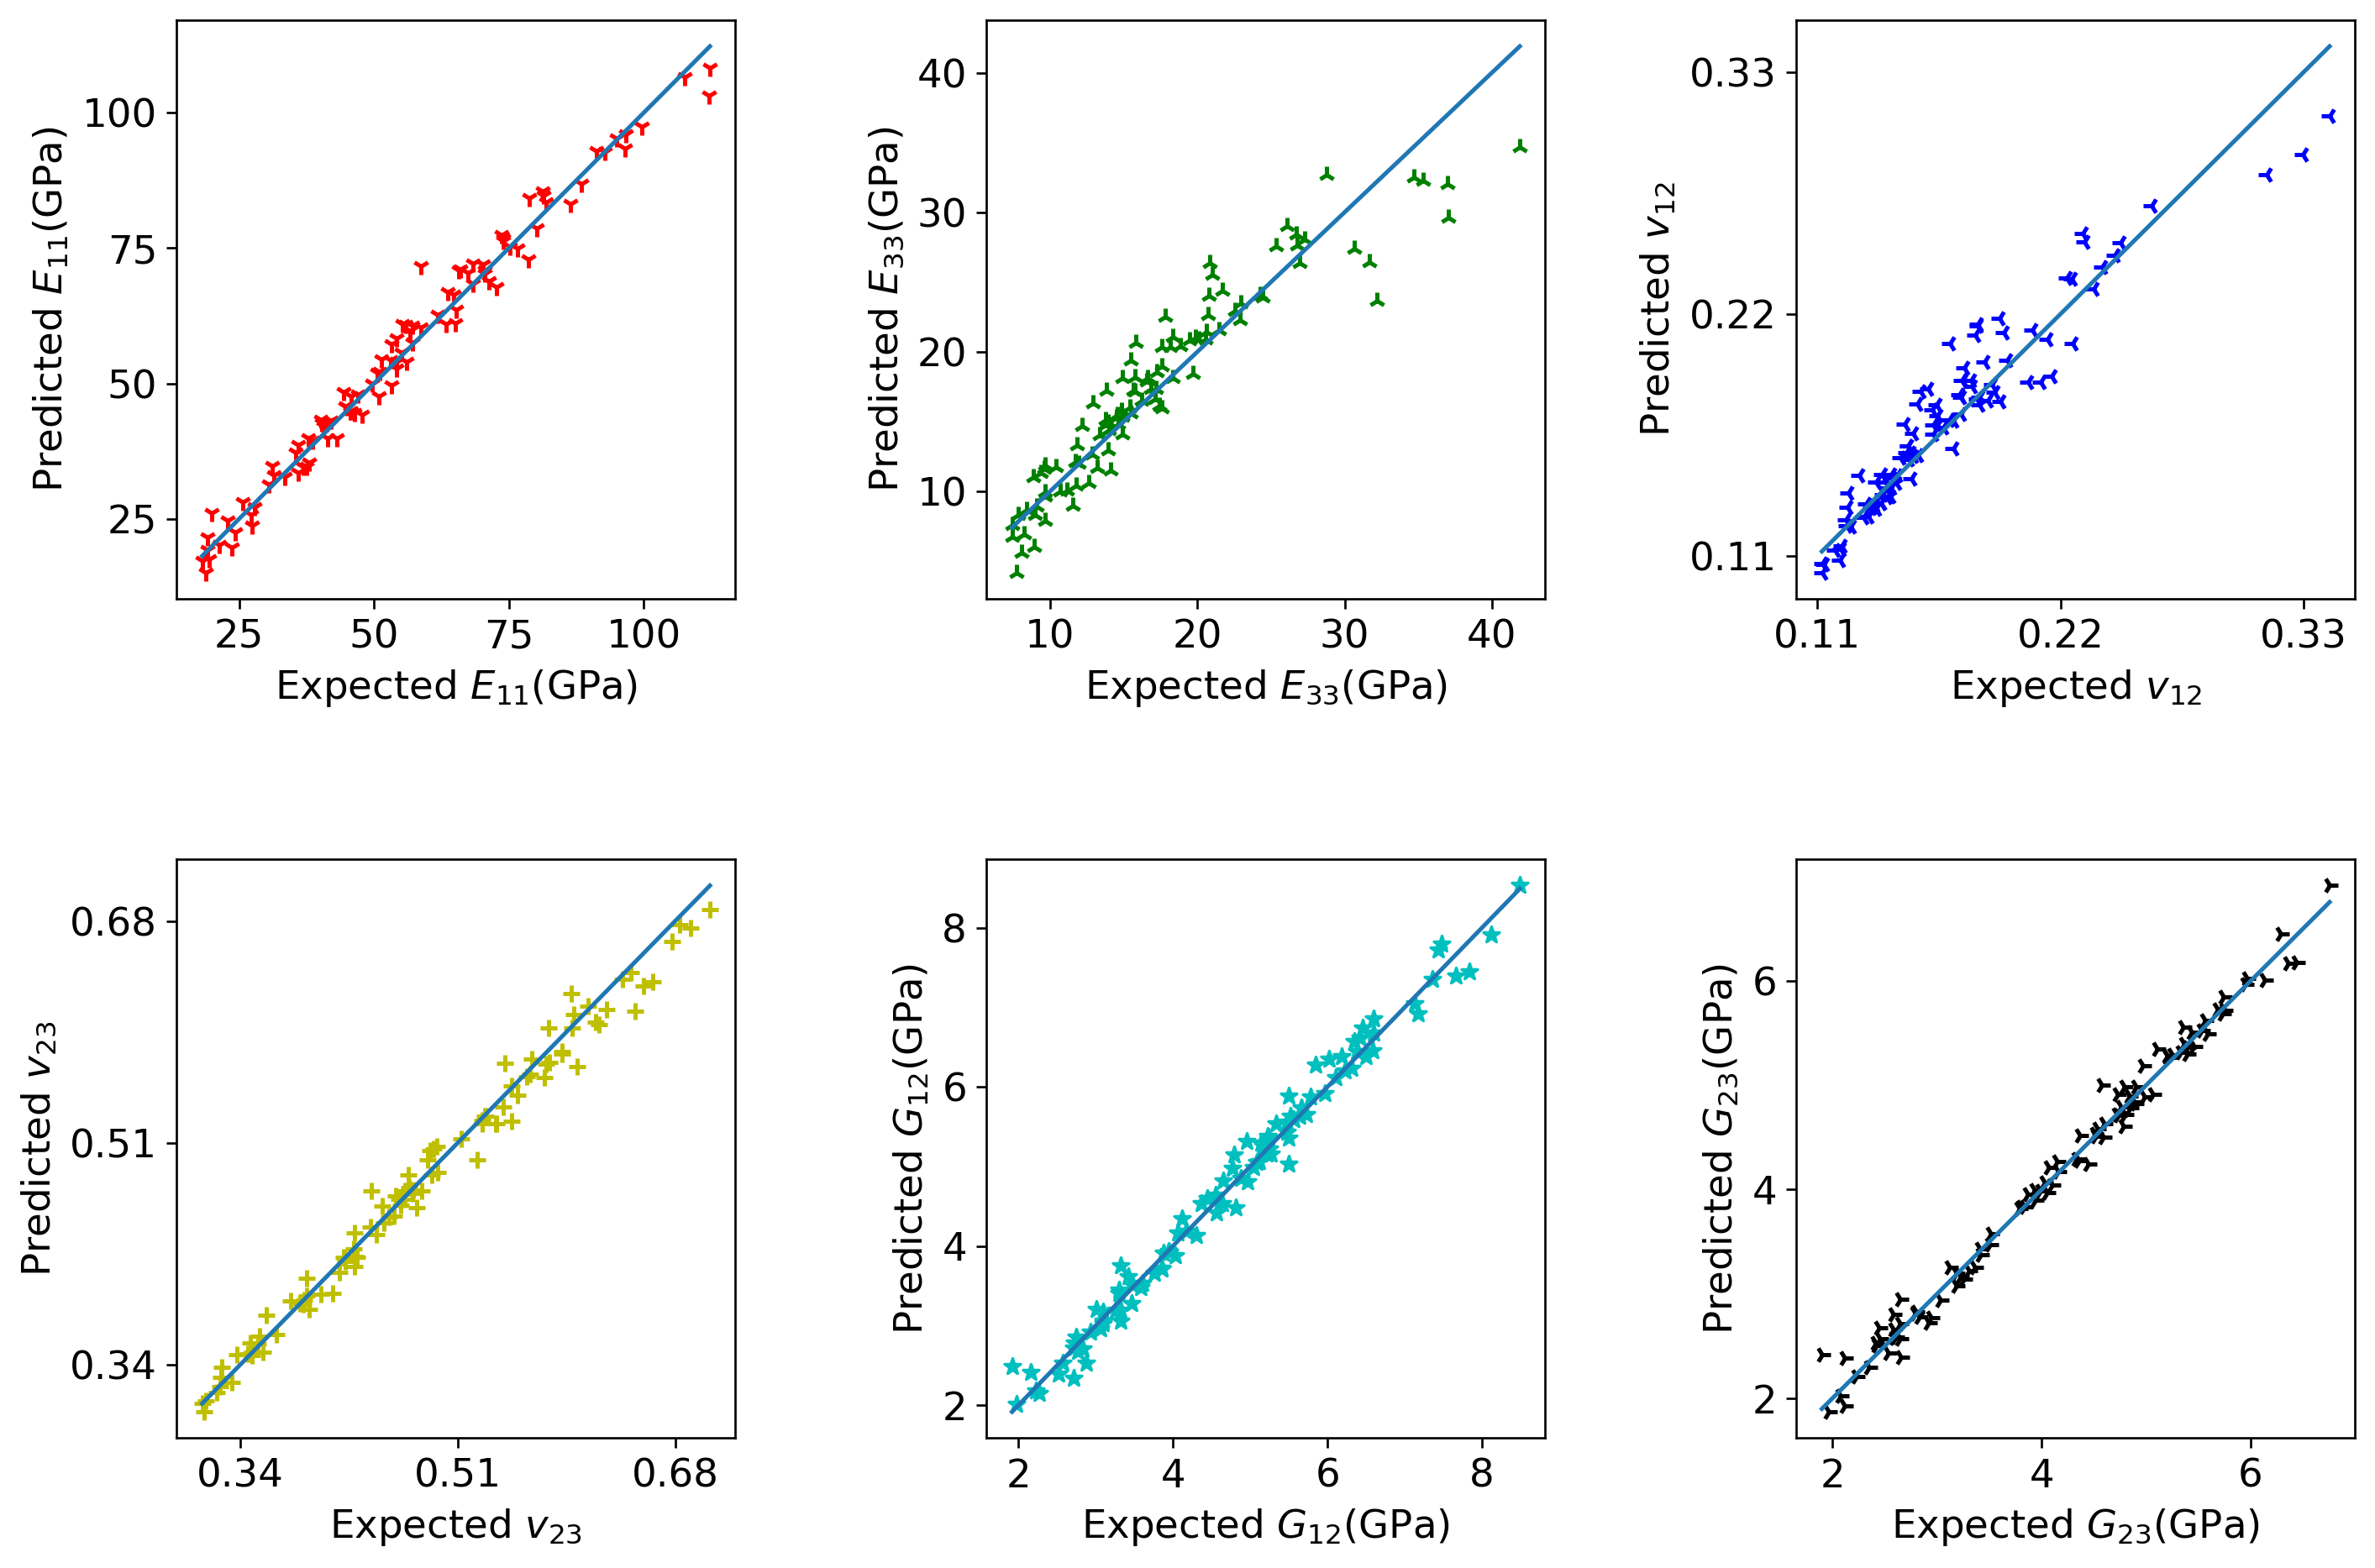

In [30]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
# ['E1','E3','v12','v23','G12','G23'] 
# Parameters at the axes level



axes[0][0].scatter(y_test[:,0]/1e3 , y_pred[:,0]/1e3 , color='r', marker='1')
x00 = 1e-3*np.array([y_test[:,0].min(), y_test[:,0].max()]) # instead of [0,1] as the plot border
y00 = x00
axes[0][0].plot(x00,y00)


axes[0][1].scatter(y_test[:,1]/1e3 , y_pred[:,1]/1e3, color='g', marker='2')
x01= 1e-3*np.array([y_test[:,1].min(), y_test[:,1].max()])
y01=x01
axes[0][1].plot(x01,y01)


axes[0][2].scatter(y_test[:,2] , y_pred[:,2], color='b', marker='3')
x02 = np.array([y_test[:,2].min(),y_test[:,2].max()])
y02 = x02
axes[0][2].plot(x02,y02)



axes[1][0].scatter(y_test[:,3] , y_pred[:,3], color='y', marker='+')
x10 = np.array([y_test[:,3].min(),y_test[:,3].max()])
y10=x10
axes[1][0].plot(x10,y10)


axes[1][1].scatter(y_test[:,4]/1e3, y_pred[:,4]/1e3, color='c', marker='*')
x11 = 1e-3*np.array([y_test[:,4].min(), y_test[:,4].max()])
y11=x11
axes[1][1].plot(x11,y11)
#axes[1][1].ticklabel_format(useOffset=True)

axes[1][2].scatter(y_test[:,5]/1e3 , y_pred[:,5]/1e3, color='black', marker='4')
x12 = 1e-3*np.array([y_test[:,5].min(), y_test[:,5].max()])
y12=x12
axes[1][2].plot(x12,y12)
#_______________________________________
# # ['E1','v12','E3','v13','G12']  Elastic properties of Woven RVE 
axes[0][0].set_xlabel('Expected $E_{11} (\mathrm{GPa})$')
axes[0][1].set_xlabel('Expected $E_{33} (\mathrm{GPa})$')
axes[0][2].set_xlabel('Expected $v_{12}$')
axes[1][0].set_xlabel('Expected $v_{23}$')
axes[1][1].set_xlabel('Expected $G_{12} (\mathrm{GPa})$')
axes[1][2].set_xlabel('Expected $G_{23} (\mathrm{GPa})$')

axes[0][0].set_ylabel('Predicted $E_{11} (\mathrm{GPa})$')
axes[0][1].set_ylabel('Predicted $E_{33} (\mathrm{GPa})$')
axes[0][2].set_ylabel('Predicted $v_{12}$')
axes[1][0].set_ylabel('Predicted $v_{23}$')
axes[1][1].set_ylabel('Predicted $G_{12} (\mathrm{GPa})$')
axes[1][2].set_ylabel('Predicted $G_{23} (\mathrm{GPa})$')


from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#axes[0][0].set_xlim(1e-3*np.array([y_test1[:,0].min(), y_test1[:,0].max()])) #set the starting point
#axes[0][0].set_ylim(1e-3*np.array([y_test1[:,0].min(), y_test1[:,0].max()]))
axes[0][0].xaxis.set_major_locator(MultipleLocator(25))
axes[0][0].yaxis.set_major_locator(MultipleLocator(25))
axes[0][1].xaxis.set_major_locator(MultipleLocator(10))
axes[0][1].yaxis.set_major_locator(MultipleLocator(10))
axes[0][2].xaxis.set_major_locator(MultipleLocator(.11))
axes[0][2].yaxis.set_major_locator(MultipleLocator(.11))
axes[1][0].xaxis.set_major_locator(MultipleLocator(.17))
axes[1][0].yaxis.set_major_locator(MultipleLocator(.17))
axes[1][1].xaxis.set_major_locator(MultipleLocator(2))
axes[1][1].yaxis.set_major_locator(MultipleLocator(2))
axes[1][2].xaxis.set_major_locator(MultipleLocator(2))
axes[1][2].yaxis.set_major_locator(MultipleLocator(2))

#an important line to adjust the plots:
plt.tight_layout()
# Use left,right,top, bottom to stretch subplots
# Use wspace,hspace to add spacing between subplots
fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.45,
    hspace=0.45,)

#______set_title('mesoscale 3D elastic properties. Predicted by ANN vs. FE simulations in Digimat')
#______input data extended from microscale ANN model. initial data set with 400 points and the 
# extended one with 600 data points.
#plt.savefig("woven_RVE_elastic_coef.pdf", format="pdf", bbox_inches="tight")

    
#adjust padding:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


plt.plot()
plt.show()

In [31]:
#plt.savefig("woven_RVE_elastic_coef.pdf", format="pdf", bbox_inches="tight")

# Visualizing residuals on the test set
**first check the position of the corresponding output 

Text(0, 0.5, 'Residual percentage[%]')

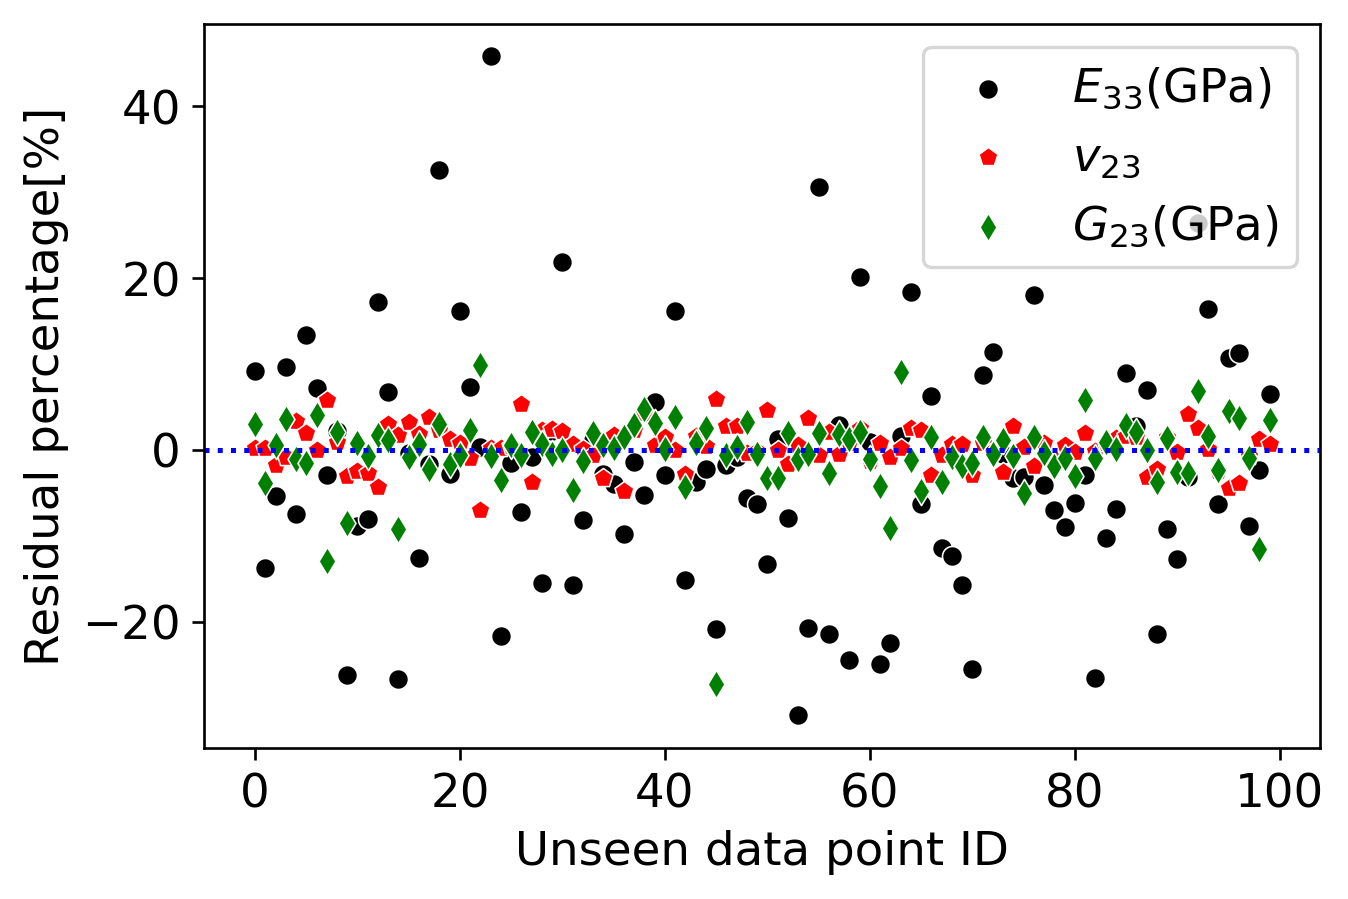

In [32]:
# definition for the residuals: 
residuals = np.zeros([6,y_test[:,0].size])
#in-plane
residuals[0,:] = 100*(y_test[:,0]-y_pred[:,0])/y_test[:,0]
residuals[1,:] = 100*(y_test[:,2]-y_pred[:,2])/y_test[:,2]
residuals[2,:] = 100*(y_test[:,4]-y_pred[:,4])/y_test[:,4]
#out_of_plane
residuals[3,:] = 100*(y_test[:,1]-y_pred[:,1])/y_test[:,1]
residuals[4,:] = 100*(y_test[:,3]-y_pred[:,3])/y_test[:,3]
residuals[5,:] = 100*(y_test[:,5]-y_pred[:,5])/y_test[:,5]
#____________________________________________
sns.scatterplot(data = residuals[3,:],color='black', marker='o', label='$E_{33} (\mathrm{GPa})$')
sns.scatterplot(data = residuals[4,:],color='red', marker='p', label='$v_{23}$')
sns.scatterplot(data = residuals[5,:],color='green', marker='d', label='$G_{23} (\mathrm{GPa})$')
plt.axhline(y=0, color='b', linestyle=':')
#plt.title('Residual of test data')
plt.xlabel('Unseen data point ID')
plt.ylabel('Residual percentage[%]')
#jp.savefig('E:\\1_PhD projects\\1_Publications\\First paper\\figures\\Meso_ANN_Residuals_400_2.svg');

In [33]:
np.std(residuals[0,:])

6.971202529541868

In [34]:
np.std(residuals[1,:])

7.13394094325732

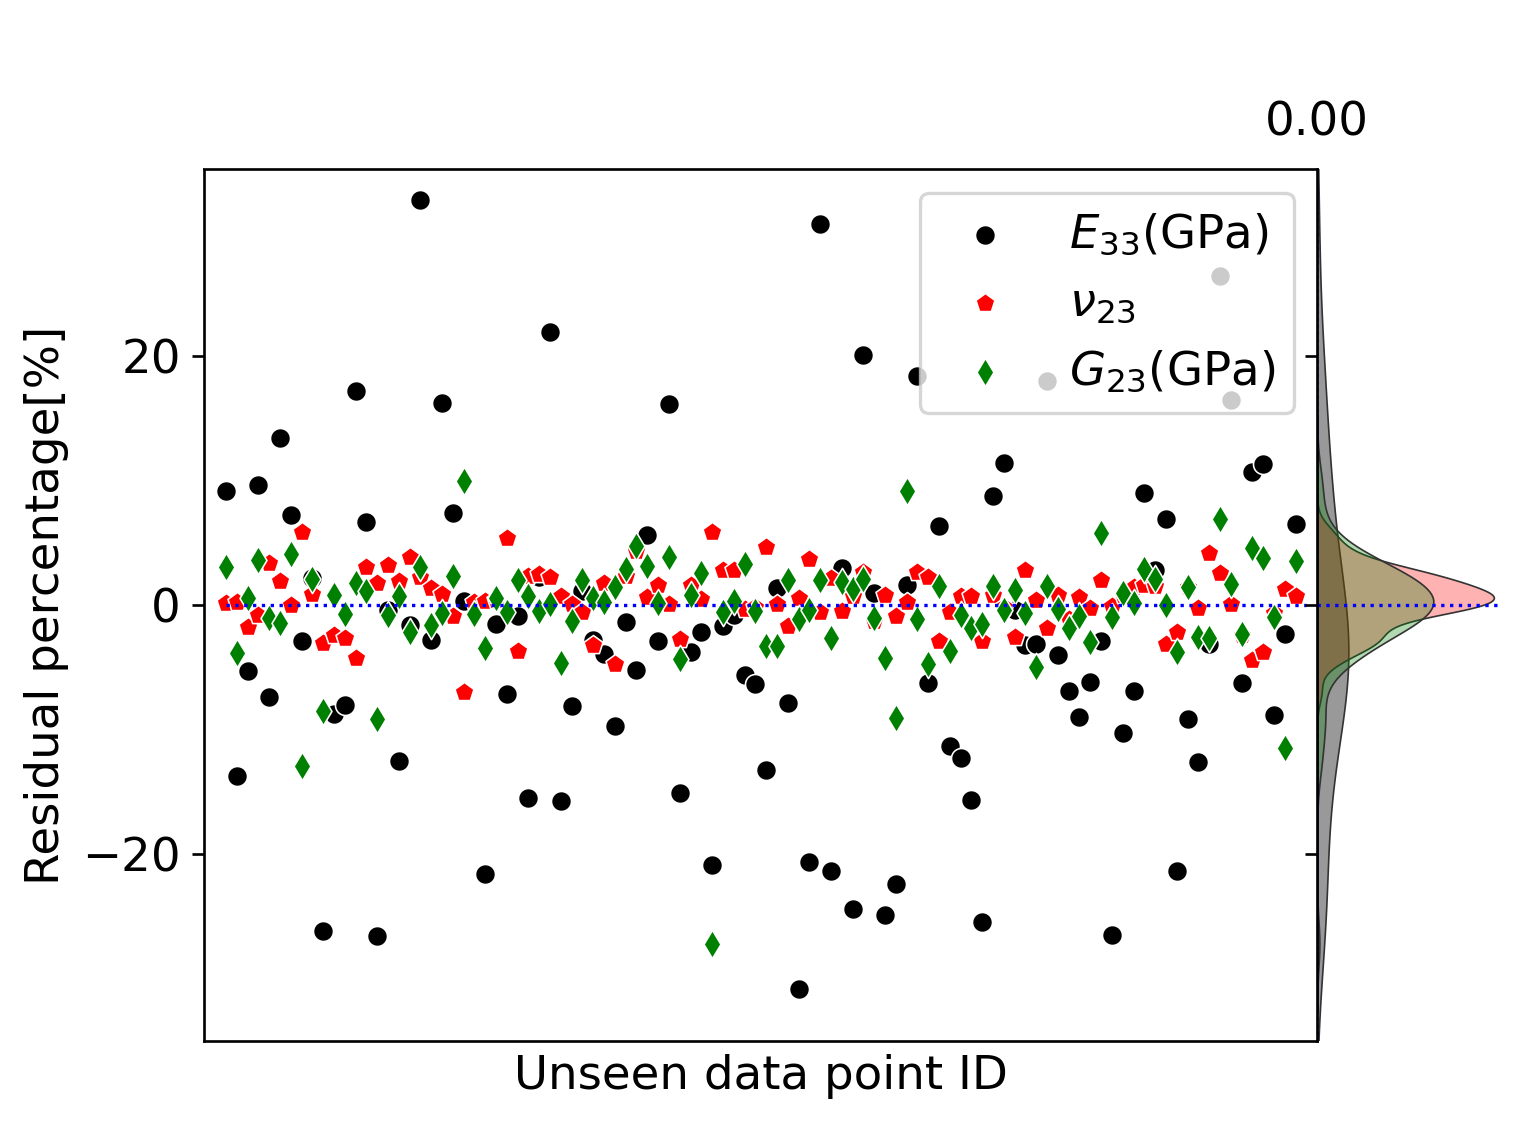

In [35]:
jp = sns.JointGrid(height=6, ratio=6, space=0, xlim=[-2,101], ylim=[-35,35],)
sns.scatterplot(data = residuals[3,:], ax=jp.ax_joint, color='black', marker='o', label='$E_{33} (\mathrm{GPa})$')
sns.scatterplot(data = residuals[4,:], ax=jp.ax_joint, color='red', marker='p',label=r'$\nu_{23} $')
sns.scatterplot(data = residuals[5,:],ax=jp.ax_joint, color='green', marker='d',label='$G_{23} (\mathrm{GPa})$')
#plot a line in grid part:
jp.ax_joint.plot([0,100], [0,0], ':', linewidth = 1, color='b')
jp.ax_joint.xaxis.set_major_locator(ticker.NullLocator())
jp.ax_joint.yaxis.set_major_locator(MultipleLocator(20))
jp.ax_joint.legend(loc='upper right', bbox_to_anchor=(1, 1),frameon=1)

sns.kdeplot(x=None, y= residuals[3,:], fill=True, color='black',label='$E_{33} (\mathrm{GPa})$', alpha=.4, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residuals[4,:], fill=True, color='red',label=r'$\nu_{23}$',alpha=.3, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residuals[5,:], fill=True, color='green',label='$G_{23} (\mathrm{GPa})$',alpha=.3, edgecolor=".2", linewidth=.5)

#set grid lines for marginal plot
jp.ax_marg_y.tick_params(labeltop=True )
jp.ax_marg_y.grid(True, axis='x', ls=':', color='blue')
#jp.ax_marg_y.xaxis.set_major_locator(MaxNLocator(2))
jp.ax_marg_y.xaxis.set(major_locator=MultipleLocator(0.19), major_formatter=FormatStrFormatter('%2.2f'))
#for out of plane properties:
#jp.ax_marg_y.xaxis.set(major_locator=MultipleLocator(0.185), major_formatter=FormatStrFormatter('%2.2f'))
plt.axhline(y=0, color='b', linestyle=':', linewidth = 1) #zero line in distribution


jp.set_axis_labels(xlabel='Unseen data point ID', ylabel='Residual percentage[%]')

jp.fig.set_figwidth(6.4)
jp.fig.set_figheight(4.8)

jp.savefig('E:\\1_PhD projects\\1_Publications\\First paper\\figures\\Meso_ANN_Residuals_400_2.svg');

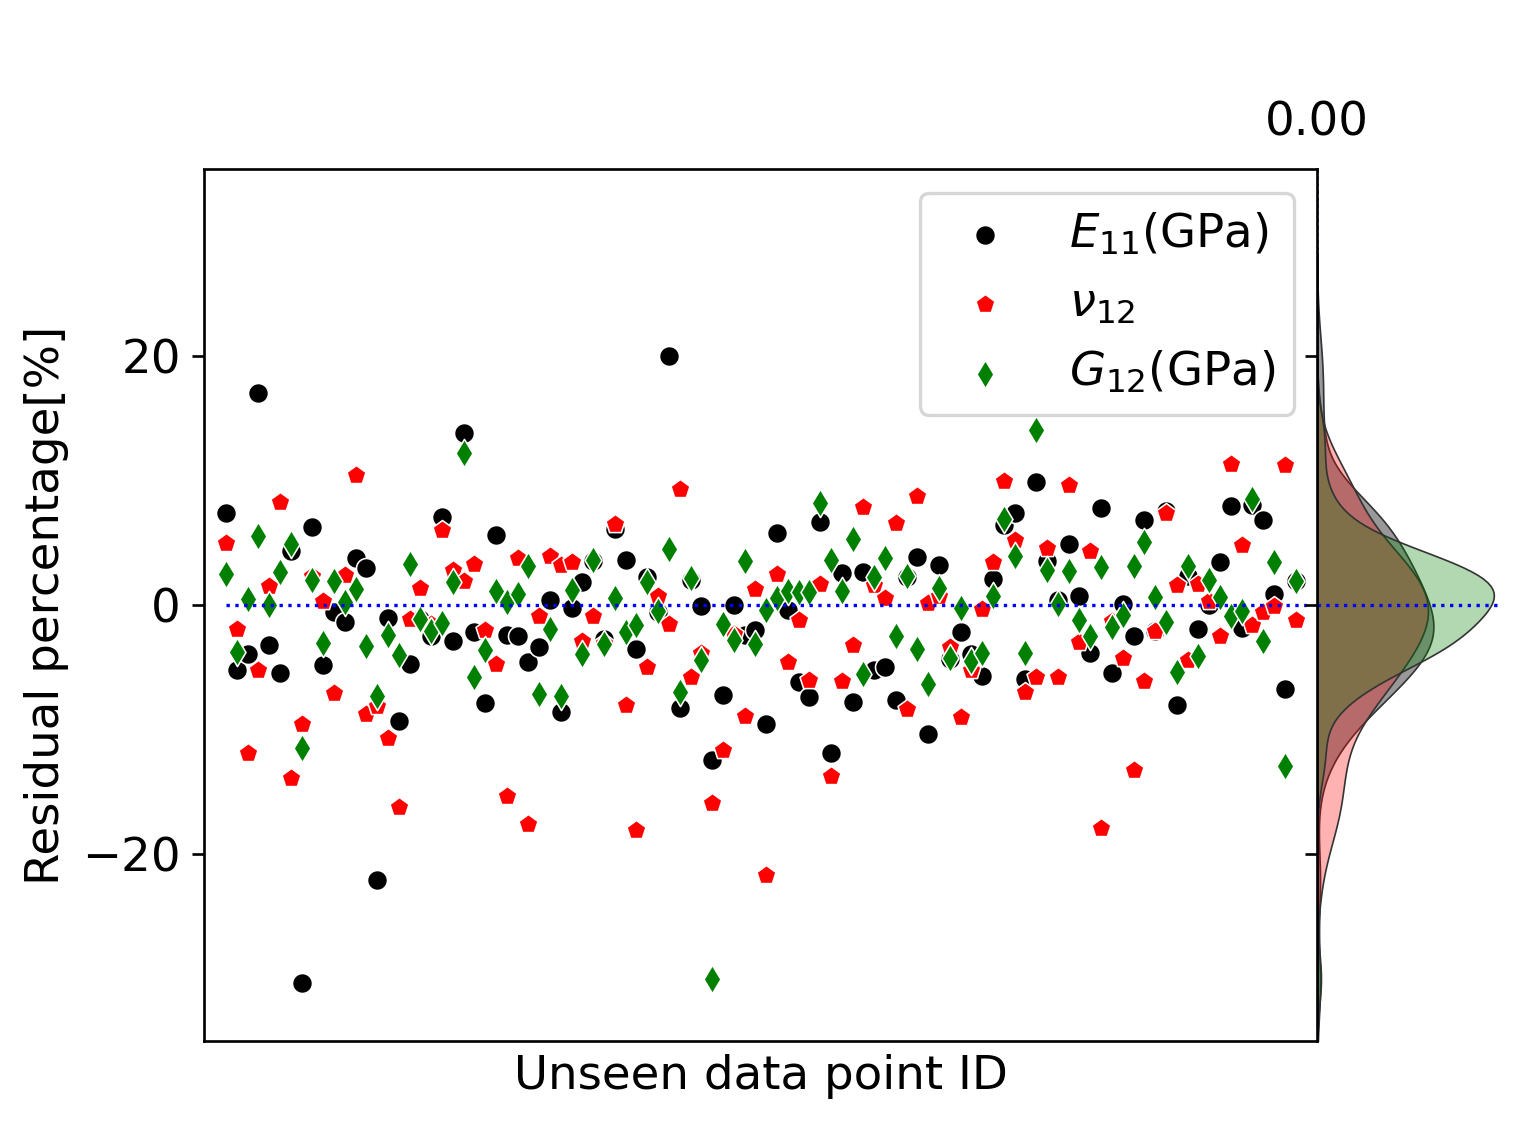

In [36]:
jp = sns.JointGrid(height=6, ratio=6, space=0, xlim=[-2,101], ylim=[-35,35],)
sns.scatterplot(data = residuals[0,:], ax=jp.ax_joint, color='black', marker='o', label='$E_{11} (\mathrm{GPa})$')
sns.scatterplot(data = residuals[1,:], ax=jp.ax_joint, color='red', marker='p',label=r'$\nu_{12} $')
sns.scatterplot(data = residuals[2,:],ax=jp.ax_joint, color='green', marker='d',label='$G_{12} (\mathrm{GPa})$')
#plot a line in grid part:
jp.ax_joint.plot([0,100], [0,0], ':', linewidth = 1, color='b')
jp.ax_joint.xaxis.set_major_locator(ticker.NullLocator())
jp.ax_joint.yaxis.set_major_locator(MultipleLocator(20))
jp.ax_joint.legend(loc='upper right', bbox_to_anchor=(1, 1),frameon=1)

sns.kdeplot(x=None, y= residuals[0,:], fill=True, color='black',label='$E_{11} (\mathrm{GPa})$', alpha=.4, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residuals[1,:], fill=True, color='red',label=r'$\nu_{12}$',alpha=.3, edgecolor=".2", linewidth=.5)
sns.kdeplot(x=None, y= residuals[2,:], fill=True, color='green',label='$G_{12} (\mathrm{GPa})$',alpha=.3, edgecolor=".2", linewidth=.5)

#set grid lines for marginal plot
jp.ax_marg_y.tick_params(labeltop=True )
jp.ax_marg_y.grid(True, axis='x', ls=':', color='blue')
#jp.ax_marg_y.xaxis.set_major_locator(MaxNLocator(2))
jp.ax_marg_y.xaxis.set(major_locator=MultipleLocator(0.101), major_formatter=FormatStrFormatter('%2.2f'))
#for out of plane properties:
#jp.ax_marg_y.xaxis.set(major_locator=MultipleLocator(0.185), major_formatter=FormatStrFormatter('%2.2f'))
plt.axhline(y=0, color='b', linestyle=':', linewidth = 1) #zero line in distribution


jp.set_axis_labels(xlabel='Unseen data point ID', ylabel='Residual percentage[%]')

jp.fig.set_figwidth(6.4)
jp.fig.set_figheight(4.8)

jp.savefig('E:\\1_PhD projects\\1_Publications\\First paper\\figures\\Meso_ANN_Residuals_400_1.svg');

# 